## $\text{Homework - I}$

$\text{Problem 3: Implementation of single-step methods}$

In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
h1 = 0.05
h2 = 0.025
h3 = 0.0125

In [3]:
def f(t,y):
    '''(a)'''
    val = np.power(t,2) - np.power(y,2)
    val *= np.sin(y)
    return val

In [4]:
def g(t,y):
    '''(b)'''
    val = 2*t + np.exp(-t*y)
    return val

In [5]:
def k(t,y):
    '''(c)'''
    val = (np.power(y,2) + 2*t*y)
    val /= (3 + np.power(t,2))
    return val

In [6]:
def forward_euler(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        y.append(y[-1] + h*func(t,y[-1]))
        t += h
        x.append(t)
    
    return x,y     

In [7]:
def backward_euler(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        
        y_prev = y[-1]
        y_old = y[-1]
        
        for i in range(100000):
            
            y_curr = y_prev + h*func(t,y_old)
            
            if np.absolute(y_curr - y_old) < np.power(10.0,-5):
                x.append(t)
                y.append(y_curr)
                break
            else:
                y_old = y_curr
        
        t += h
    
    return x,y

In [8]:
def heun(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        
        y_ = y[-1]
        f = func(x[-1],y[-1])
        f_ = func(x[-1],y[-1] + h*f)
        y_ += (h/2)*(f + f_)
        y.append(y_)
        
        t += h
        x.append(t)
    
    return x,y  

In [9]:
def runge_kutta(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        
        k1 = func(x[-1],y[-1])
        k2 = func(x[-1] + (h/2), y[-1] + (h/2)*k1)
        k3 = func(x[-1] + (h/2), y[-1] + (h/2)*k2)
        k4 = func(x[-1] + h, y[-1] + h*k3)
        y_ = y[-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        y.append(y_)
        
        t += h
        x.append(t)
    
    return x,y  

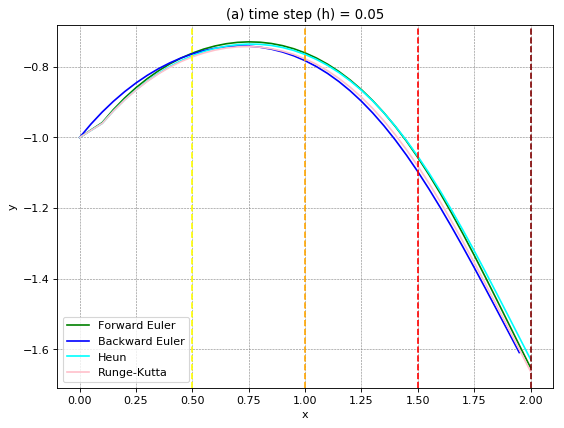

In [10]:
xf1,yf1 = forward_euler(0,2,-1,h1,f)
xb1,yb1 = backward_euler(0,2,-1,h1,f)
xh1,yh1 = heun(0,2,-1,h1,f)
xrk1,yrk1 = runge_kutta(0,2,-1,h1,f)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(a) time step (h) = 0.05')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

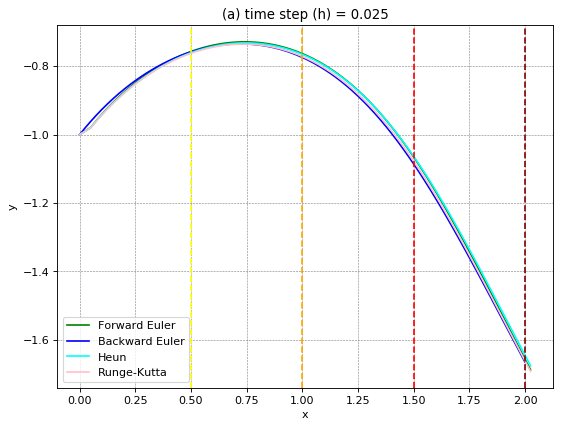

In [11]:
xf1,yf1 = forward_euler(0,2,-1,h2,f)
xb1,yb1 = backward_euler(0,2,-1,h2,f)
xh1,yh1 = heun(0,2,-1,h2,f)
xrk1,yrk1 = runge_kutta(0,2,-1,h2,f)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(a) time step (h) = 0.025')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

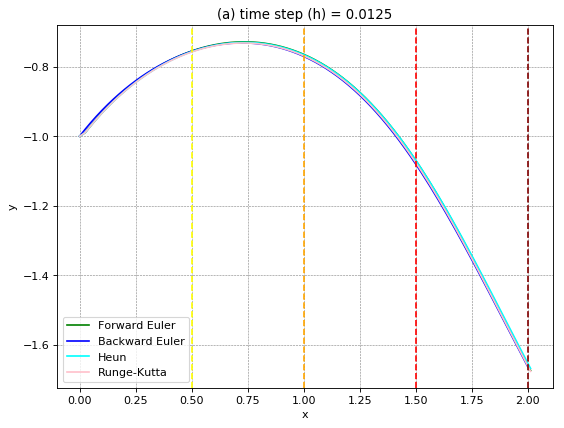

In [12]:
xf1,yf1 = forward_euler(0,2,-1,h3,f)
xb1,yb1 = backward_euler(0,2,-1,h3,f)
xh1,yh1 = heun(0,2,-1,h3,f)
xrk1,yrk1 = runge_kutta(0,2,-1,h3,f)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(a) time step (h) = 0.0125')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

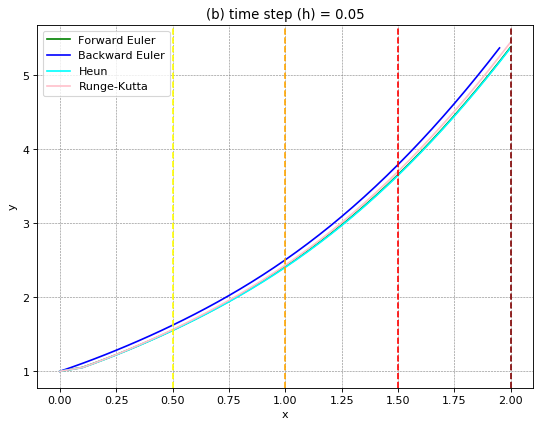

In [13]:
xf1,yf1 = forward_euler(0,2,1,h1,g)
xb1,yb1 = backward_euler(0,2,1,h1,g)
xh1,yh1 = heun(0,2,1,h1,g)
xrk1,yrk1 = runge_kutta(0,2,1,h1,g)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(b) time step (h) = 0.05')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

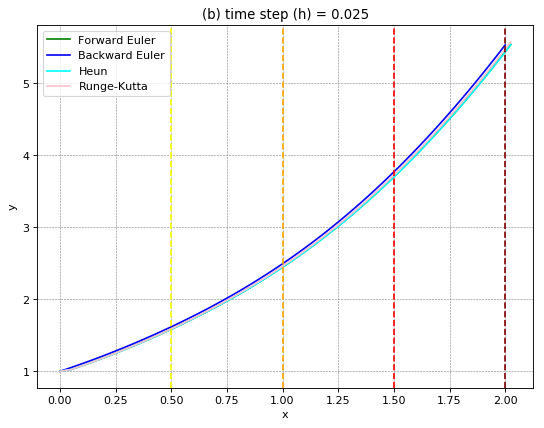

In [14]:
xf1,yf1 = forward_euler(0,2,1,h2,g)
xb1,yb1 = backward_euler(0,2,1,h2,g)
xh1,yh1 = heun(0,2,1,h2,g)
xrk1,yrk1 = runge_kutta(0,2,1,h2,g)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(b) time step (h) = 0.025')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

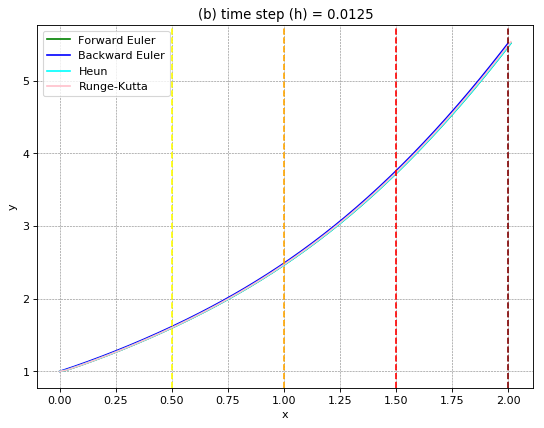

In [15]:
xf1,yf1 = forward_euler(0,2,1,h3,g)
xb1,yb1 = backward_euler(0,2,1,h3,g)
xh1,yh1 = heun(0,2,1,h3,g)
xrk1,yrk1 = runge_kutta(0,2,1,h3,g)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(b) time step (h) = 0.0125')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

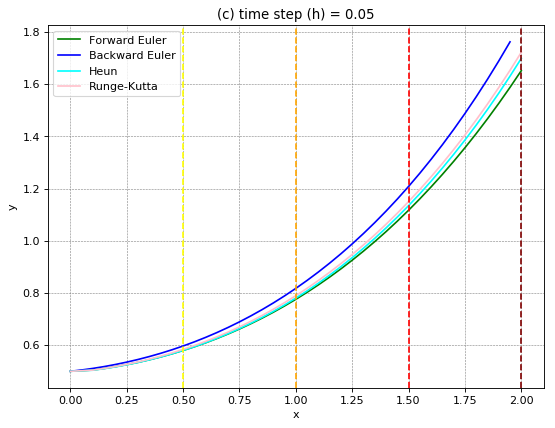

In [16]:
xf1,yf1 = forward_euler(0,2,0.5,h1,k)
xb1,yb1 = backward_euler(0,2,0.5,h1,k)
xh1,yh1 = heun(0,2,0.5,h1,k)
xrk1,yrk1 = runge_kutta(0,2,0.5,h1,k)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(c) time step (h) = 0.05')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

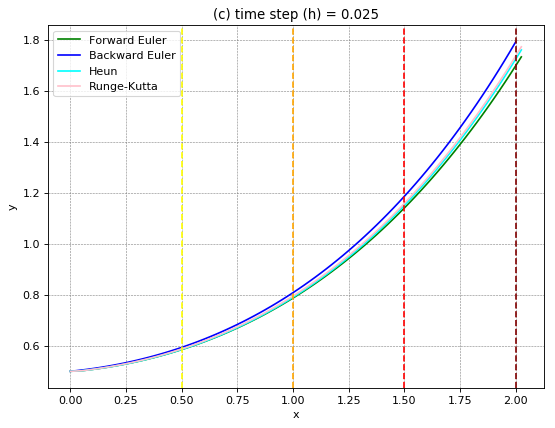

In [17]:
xf1,yf1 = forward_euler(0,2,0.5,h2,k)
xb1,yb1 = backward_euler(0,2,0.5,h2,k)
xh1,yh1 = heun(0,2,0.5,h2,k)
xrk1,yrk1 = runge_kutta(0,2,0.5,h2,k)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(c) time step (h) = 0.025')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

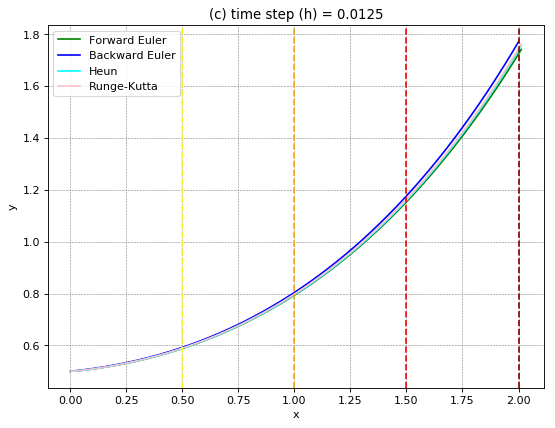

In [18]:
xf1,yf1 = forward_euler(0,2,0.5,h3,k)
xb1,yb1 = backward_euler(0,2,0.5,h3,k)
xh1,yh1 = heun(0,2,0.5,h3,k)
xrk1,yrk1 = runge_kutta(0,2,0.5,h3,k)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(c) time step (h) = 0.0125')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(xf1,yf1,color='green',label='Forward Euler')
plt.plot(xb1,yb1,color='blue',label='Backward Euler')
plt.plot(xh1,yh1,color='cyan',label='Heun')
plt.plot(xrk1,yrk1,color='pink',label='Runge-Kutta')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

#### $\text{Ashwin Singh}$
<br/>

#### $\text{2017222}$